# Prática Independente - Variáveis dummies.

### Dataset cereais

O dataset a seguir contém informação sobre diferentes cereais.

As categorias nas colunas são:
       
   * **name** : Nome do fabricante
      * A = American Home Food Products
      * G = General Mills
      * K = Kelloggs
      * N = Nabisco
      * P = Post
      * Q = Quaker Oats
      * R = Ralston Purina 
   
   
   * **type**:
      * C = frio  
      * H = quente 
        
   
   * **calories**: calorias por porção
   * **protein**: gramas de proteínas
   * **fat**: gramas de gordura
   * **sodium**: miligramas de sódio
   * **fiber**: gramas de fibra dietética
   * **arbo**: gramas de açúcares complexos
   * **sugars**: gramas de açúcares simples
   * **potass**: miligramas de K
   * **vitamins**: vitaminas e minerais - 0, 25, ou 100, indicando a % recomendado pela FDA.
   * **shelf**: display shelf (1, 2, or 3, counting from the floor)
   * **weight**: peso en onças de uma porção
   * **cups**: número de copos em uma porção 
   * **rating**: classificação dos cereais (Possibly from Consumer Reports?)
        
A partir desta informação:
     
  * Caracterizar o tipo de dado de cada coluna (_string, int, float_) e,
  * Reconhecer o tipo variável (_contínua, categórica_).

### Ler o Arquivo 'cereal.csv'.

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

#### Exercício 1: Imprimir 5 amostras para reconhecimento de dados. Coincidem com as caracterizações realizadas?

In [5]:
df = pd.read_csv('cereal.csv')
df.sample(5)

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
24,Froot Loops,K,C,110,2,1,125,1.0,11.0,13,30,25,2,1.0,1.00,32.207582
33,Grape-Nuts,P,C,110,3,0,170,3.0,17.0,3,90,25,3,1.0,0.25,53.371007
53,Product 19,K,C,100,3,0,320,1.0,20.0,3,45,100,3,1.0,1.00,41.503540
40,Kix,G,C,110,2,1,260,0.0,21.0,3,40,25,2,1.0,1.50,39.241114
39,Just Right Fruit & Nut,K,C,140,3,1,170,2.0,20.0,9,95,100,3,1.3,0.75,36.471512


#### Exercício 2: Escolher uma coluna categórica e converter em uma variável dummie, a função `pd.get_dummies()` pode ser usada.


In [6]:
dummies = pd.get_dummies(df.loc[:,'mfr'])
dummies.head()

,A,G,K,N,P,Q,R
0,0,0,0,1,0,0,0
1,0,0,0,0,0,1,0
2,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0
4,0,0,0,0,0,0,1


#### Exercício 3: Pegar a coluna de fabricante, transformar a variável dummie e contar quantos produtos são pertencem à marca "Kellogg's".

In [7]:
dummies['K'].sum()

23

#### Exercício 4: Organizar os fabricantes por quantidade de produtos em ordem decrescente e apresentá-los em um gráfico.

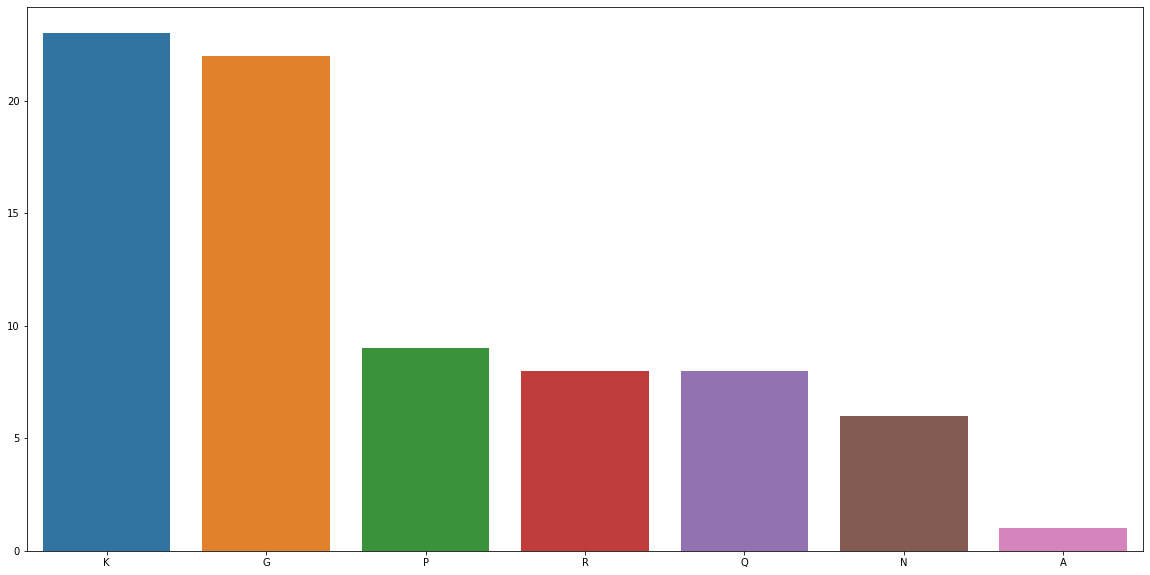

In [8]:
import matplotlib.pyplot as plt

manf_sort = pd.get_dummies(df['mfr']).sum().sort_values(ascending = False)
plt.figure(figsize=(20,10))
sns.barplot(manf_sort.index,manf_sort.values)

plt.show()

#### Exercício 5: Pegar as colunas `mfr` e `type`, convertê-las em variáveis dummies simultaneamente e obter uma descrição desse dataframe. Lembre-se que a função `.get_dummies()` permite pegar mais de uma coluna, por exemplo, usando slicing. 

In [9]:
pd.get_dummies(df.loc[:,'mfr':'type']).describe()

,mfr_A,mfr_G,mfr_K,mfr_N,mfr_P,mfr_Q,mfr_R,type_C,type_H
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,0.012987,0.285714,0.298701,0.077922,0.116883,0.103896,0.103896,0.961039,0.038961
std,0.113961,0.454716,0.460690,0.269807,0.323388,0.307127,0.307127,0.194771,0.194771
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
